# **GRADED CHALLENGE 3**

## **BAB I**

### **NAMA    : ENGGAR KRISTIAN**
### **BATCH   : 011**

## **BAB II**

In [1]:
import numpy as np 
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
df.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [4]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
# mengisi missing value pada kolom "usd pleged" menjadi 0 dengan tipe float
df["usd pledged"].fillna(
    value=0,
    inplace=True
)

# mengisi missing value pada kolom "name" menjadi nonema dengan tipe object
df["name"].fillna(
    value="noname",
    inplace=True
)

In [6]:
# mengubah kolom "deadline" dan kolom "launched" berjenis date_time
df["deadline"]= pd.to_datetime(df["deadline"])
df["launched"]= pd.to_datetime(df["launched"])
df.info("deadline, launched")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                378661 non-null  int64         
 1   name              378661 non-null  object        
 2   category          378661 non-null  object        
 3   main_category     378661 non-null  object        
 4   currency          378661 non-null  object        
 5   deadline          378661 non-null  datetime64[ns]
 6   goal              378661 non-null  float64       
 7   launched          378661 non-null  datetime64[ns]
 8   pledged           378661 non-null  float64       
 9   state             378661 non-null  object        
 10  backers           378661 non-null  int64         
 11  country           378661 non-null  object        
 12  usd pledged       378661 non-null  float64       
 13  usd_pledged_real  378661 non-null  float64       
 14  usd_

In [7]:
df['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [8]:
# Mendapatkan Median, and Mode

data_median = df.median().rename('median')
data_mode = df.mode().iloc[0].rename('mode')

central_tendency = pd.concat([data_median, data_mode], axis=1)
central_tendency

<ipython-input-8-a62614c9f52b>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_median = df.median().rename('median')


,median,mode
ID,1.075276e+09,5971
goal,5.200000e+03,5000
pledged,6.200000e+02,0
backers,1.200000e+01,0
usd pledged,3.750000e+02,0
usd_pledged_real,6.243300e+02,0
usd_goal_real,5.500000e+03,5000
name,NaN,New EP/Music Development
category,NaN,Product Design
main_category,NaN,Film & Video


In [9]:
# Mendapatkan mean
data_mean = df.groupby(by=['main_category'])[['goal','pledged','backers','usd pledged','usd_pledged_real','usd_goal_real']].mean()
data_mean

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
main_category,,,,,,
Art,40829.180144,3606.970044,42.205094,2534.057110,3220.986968,39198.575879
Comics,20243.646297,6899.311189,134.771236,5344.016859,6610.443828,19571.430669
Crafts,11592.285901,2016.153947,27.283687,1179.190619,1632.907282,10434.466228
Dance,10321.331290,3690.798684,42.801221,2962.203792,3452.946356,9588.328548
Design,46733.630260,27119.751279,241.299634,17031.327236,24417.034698,41871.388591
Fashion,24818.246005,6549.031814,61.447800,4278.980929,5712.450839,22412.409361
Film & Video,84334.009667,6362.733853,66.015208,5455.312274,6157.978427,82625.292254
Food,48693.745411,5340.163268,54.172466,4209.420888,5113.669716,49039.620804
Games,50711.298323,21865.173174,321.785615,16303.880699,21041.903140,44923.741408


### Measure of Variance

goal range: 99999999.99
__________________________________________________

Percentile in quantile  : 
 50000.0
__________________________________________________

Quartiles  : 
 0.25     2000.0
0.50     5200.0
0.75    16000.0
Name: goal, dtype: float64
__________________________________________________

Variance  :
 1400414872097.0361
__________________________________________________

Standar Deviation  :  1183391.2590927128
__________________________________________________


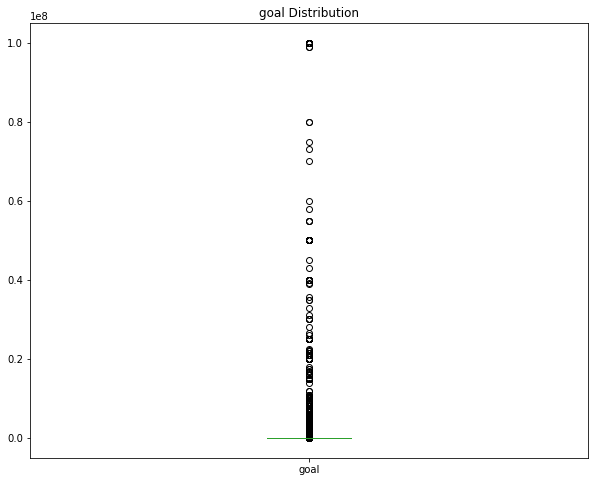

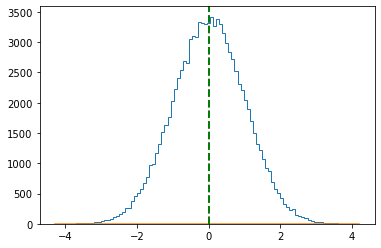

pledged range: 20338986.27
__________________________________________________

Percentile in quantile  : 
 14141.26
__________________________________________________

Quartiles  : 
 0.25      30.0
0.50     620.0
0.75    4076.0
Name: pledged, dtype: float64
__________________________________________________

Variance  :
 9146246409.673967
__________________________________________________

Standar Deviation  :  95636.01000498697
__________________________________________________


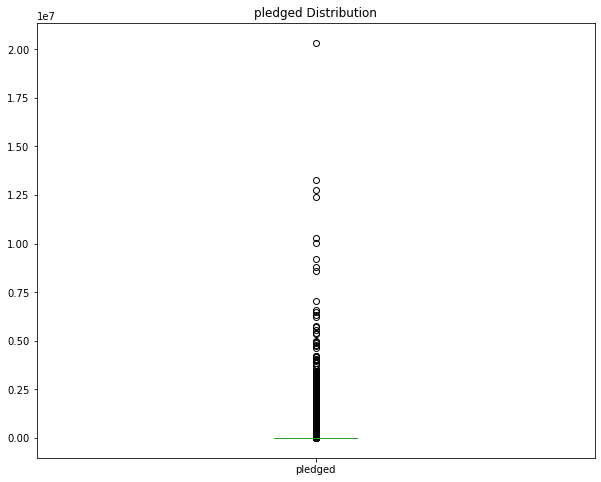

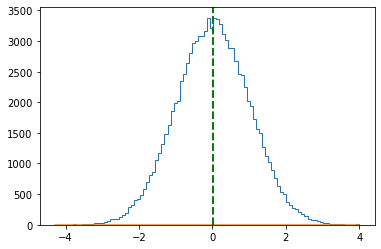

backers range: 219382
__________________________________________________

Percentile in quantile  : 
 166.0
__________________________________________________

Quartiles  : 
 0.25     2.0
0.50    12.0
0.75    56.0
Name: backers, dtype: float64
__________________________________________________

Variance  :
 822984.6873539966
__________________________________________________

Standar Deviation  :  907.1850347938928
__________________________________________________


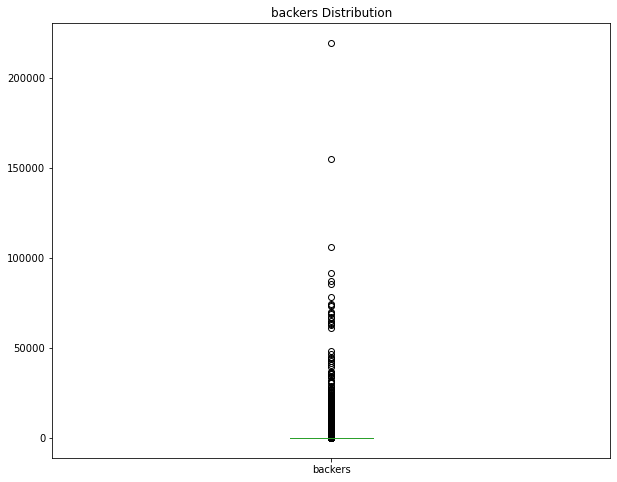

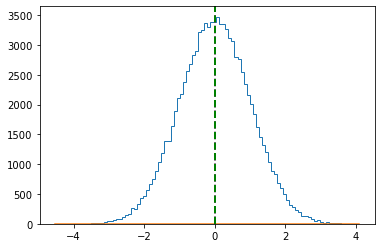

usd_pledged_real range: 20338986.27
__________________________________________________

Percentile in quantile  : 
 13670.99
__________________________________________________

Quartiles  : 
 0.25      31.00
0.50     624.33
0.75    4050.00
Name: usd_pledged_real, dtype: float64
__________________________________________________

Variance  :
 8276149156.121636
__________________________________________________

Standar Deviation  :  90973.34310731708
__________________________________________________


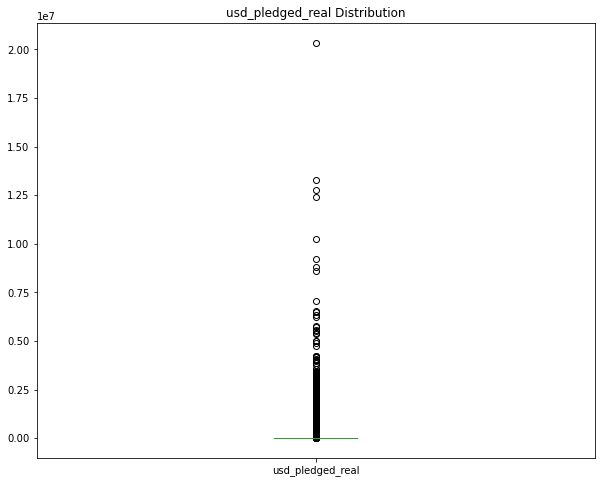

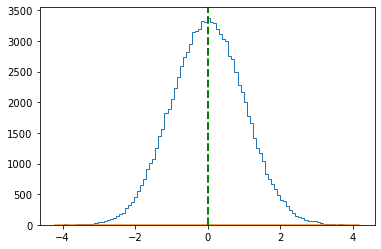

usd_goal_real range: 166361390.70000002
__________________________________________________

Percentile in quantile  : 
 45000.0
__________________________________________________

Quartiles  : 
 0.25     2000.0
0.50     5500.0
0.75    15500.0
Name: usd_goal_real, dtype: float64
__________________________________________________

Variance  :
 1329293829528.3057
__________________________________________________

Standar Deviation  :  1152950.0550883831
__________________________________________________


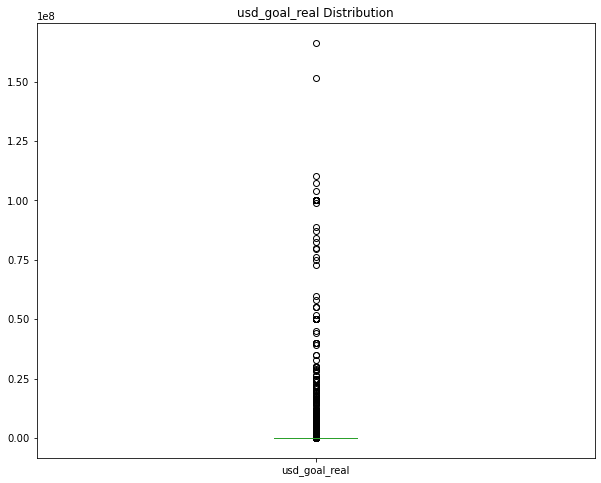

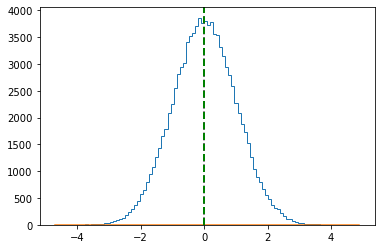

In [10]:
from scipy import stats
numcols = ['goal', 'pledged', 'backers', 'usd_pledged_real','usd_goal_real']
df1 = pd.DataFrame(np.random.randn(100000,5), columns=['goal', 'pledged', 'backers', 'usd_pledged_real','usd_goal_real'])

for col in numcols:
  print(df[col].name + ' range: ' + str(df[col].max() - df[col].min())) # Menentukan Range
  print("_"*50)
  print("\nPercentile in quantile  : \n", df[col].quantile(q = 0.9))# Menentukan Percentile  
  print("_"*50)
  print("\nQuartiles  : \n", df[col].quantile([0.25, 0.5, 0.75]))# Menentukan Quartiles
  print("_"*50)
  print("\nVariance  :\n", df[col].var())# menentukan Variance
  print("_"*50)
  print("\nStandar Deviation  : ", df[col].std())
  print("_"*50)
  df[col].plot(kind='box', title=col + ' Distribution', figsize=(10,8))# Box plot
  plt.show()
  # Visualization Distribution Normal
  density = stats.gaussian_kde(df[col])
  n, x, _ = plt.hist(df1[col], histtype='step', bins=100)
  plt.plot( x, density(x)*2**7.5)
  plt.axvline(df1[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df1[col].median(), color='green', linestyle='dashed', linewidth=2)
  plt.show()
  

## **Hypothesis Testing ANOVA**

In [11]:
data_UGD = df.groupby(by=['state'])[['usd_goal_real']].sum()
data_UGD


,usd_goal_real
state,
canceled,2.930894e+09
failed,1.249085e+10
live,1.750363e+08
successful,1.276983e+09
suspended,3.234340e+08
undefined,1.461496e+07


In [12]:
# Import library yang dibutuhkan hipotesis menggunakan ANOVA
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as multi
import scipy.stats as stats

**Fit model ANOVA ke data**

In [13]:
model = smf.ols('usd_goal_real ~ state', data=df).fit()
aov_table = anova_lm(model, typ=1)
print(aov_table)

                df        sum_sq       mean_sq          F        PR(>F)
state          5.0  3.081162e+14  6.162325e+13  46.385665  4.274467e-48
Residual  378655.0  5.030423e+17  1.328498e+12        NaN           NaN


**Keterangan    :**
- df        = Degree of Freedom
- sum_sq    = Penjumlahan seluruh nilai di kolom *usd_goal_real* terhadap *main_category*
- mean_sq   = Rata-rata dari penjumlahan seluruh nilai di kolom *usd_goal_real* terhadap *main_category*
- F         = *Frequency* data statistik pada dataframe
- PR(>F)    = P-value 


Pada output tersebut ada perbedaan significant di dalam *state* yang mana PR(>F) sama dengan P-value\
bernilai  4.274467e-48 < 0.005 yang artinya ada perbedaan di setiap unique pada kolom main_category terhadap nilai usd_goal_real

Dari output tersebut kita tahu ada perbedaan yang signifikan.\
Maka dari itu, mari kita cari tahu lebih lanjut pasangan apa saja yang memiliki perbedaan yang significant

In [14]:
# Mengunakan library Multi Comparison 
mcstate = multi.MultiComparison(df['usd_goal_real'], df['state'])
# Hasilnya uji lanjut menggunakan Tukey 
hasil_state = mcstate.tukeyhsd()
print(hasil_state.summary())


           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
  canceled     failed  -12404.6732 0.3801  -30646.4967   5837.1504  False
  canceled       live  -13044.1345    0.9  -77329.0482  51240.7793  False
  canceled successful   -66046.562  0.001  -84986.9035 -47106.2206   True
  canceled  suspended   99628.5949 0.0039   21383.0614 177874.1284   True
  canceled  undefined  -71476.3933 0.0053 -128982.2815 -13970.5052   True
    failed       live    -639.4613    0.9  -63160.7686   61881.846  False
    failed successful  -53641.8889  0.001  -65265.1528 -42018.6249   True
    failed  suspended   112033.268  0.001    35230.096 188836.4401   True
    failed  undefined  -59071.7202 0.0293 -114599.1089  -3544.3314   True
      live successful  -53002.4276 0.1534 -115731.0994   9726.2443  False
      live  suspended  112672.7294 0.0

**Keterangan    :**
- True  = Terdapat perbedaan *Significant*
- False = Tidak terdapat perbedaan yang *Significant*   
- lower & upper = Coevicient Intervals
- meandiff = selisih rata-rata antar kelompok
- p-adj = menyatakan nilai P-value yang akan digunakan untuk menarik kesimpulan



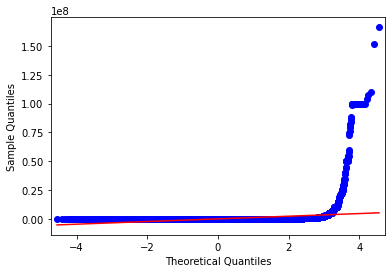

In [15]:
# Check distribusi normal terhadap residuals
residuals = model.resid
fig = sm.qqplot(residuals, line='s')
plt.show()

Dilihat dari grafik, dati titik biru yang menjauh dari garis merah menunjukkan bahwa residual tidak terdistribusi dengan normal 

**Menggukan Box plot untuk membandingkan rata-rata dan variabilitas terhadap usd_gold_real**

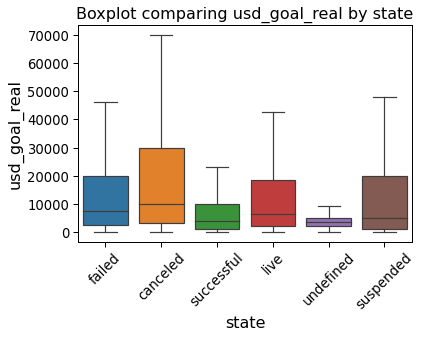

In [16]:
sns.set_context("paper", font_scale=1.5, rc={"font.size":16, "axes.titlesize":16,"axes.labelsize":16})# mendifinisikan ukuran dari plot
plt.title('Boxplot comparing usd_goal_real by state')
sns.boxplot(x='state',y='usd_goal_real', data=df, showfliers=False) # Menghilangkan outliers agar boxplot terlihat jelas perbedaannya
plt.xlabel('state')
plt.ylabel('usd_goal_real')
plt.xticks(rotation=45)
plt.show()

Maka dari output oneway anova hypothesis testing *hasil_state* yang membandingkan dari masing-pasing pasang unique dari kolom *state*  kita bisa menarik kesimpulan bahwa keterangan False adalah fail to reject null hypothesis, dan True adalah reject null hypothesis

**Model Diagnostics**

**Cara lain untuk mencari persamaan variance terhadap *state* menggunakan levene test**

In [17]:
df['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [18]:
UGD_failed = df['usd_goal_real'][df['state']=='failed']
UGD_canceled = df['usd_goal_real'][df['state']=='canceled']
UGD_successful = df['usd_goal_real'][df['state']=='successful']
UGD_live = df['usd_goal_real'][df['state']=='live']
UGD_undifined = df['usd_goal_real'][df['state']=='undefined']
UGD_suspended = df['usd_goal_real'][df['state']=='suspended']

In [19]:
test_statistic, p_value = stats.levene(UGD_failed, UGD_canceled, UGD_successful, UGD_live, UGD_undifined, UGD_suspended)
print("test_statistic   : ", test_statistic)
print("p_value          : ", p_value)

test_statistic   :  44.16034596342728
p_value          :  1.0323374562530415e-45


Dengan cara levene test nilainya tidak jauh berbeda dengan cara fit model p_value < 0.05 maka reject null hypotesis

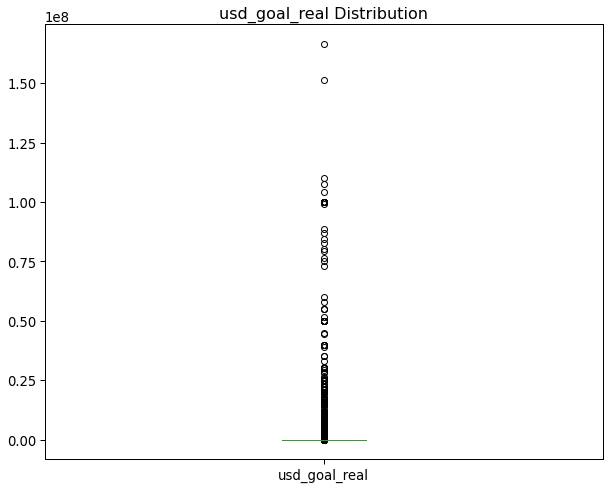

In [27]:
df['usd_goal_real'].plot(kind='box', title='usd_goal_real Distribution', figsize=(10,8))# Box plot
plt.show()

In [28]:
df['usd_goal_real'].describe()

count    3.786610e+05
mean     4.545440e+04
std      1.152950e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.500000e+03
75%      1.550000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

In [29]:
UGR = df['usd_goal_real']

In [41]:
#Q1 = df['AVG'].quantile(0.25)
#Q3 = df['AVG'].quantile(0.75)
#IQR = Q3 - Q1    #IQR is interquartile range. 
# filter = (df['AVG'] >= Q1 - 1.5 * IQR) & (df['AVG'] <= Q3 + 1.5 *IQR)
# df.loc[filter] 
UGR.quantile(0.75)+1.5*(UGR.quantile(0.75)-UGR.quantile(0.25))
df_filt = df[df['usd_goal_real']<=0.5e+6]

<AxesSubplot:ylabel='Frequency'>

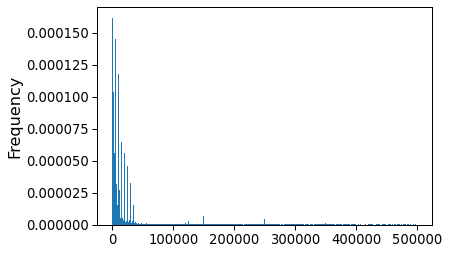

In [42]:
df_filt['usd_goal_real'].plot.hist(bins=1000,density=True)

<AxesSubplot:>

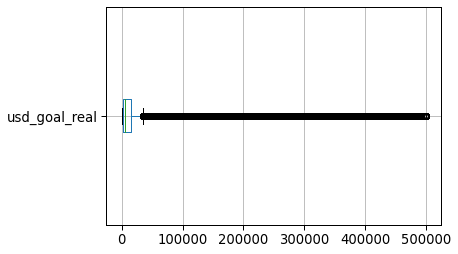

In [43]:
df_filt.boxplot('usd_goal_real',vert=False)

In [44]:
df_filt.shape

(376418, 15)

In [45]:
df.shape

(378661, 15)

In [24]:
#Way-1 Using inbuilt Functions

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df1))
print(z)



[[0.73763602 1.5381843  0.67460319 0.14215161 0.46324647]
 [0.41409694 0.63534232 0.73995711 0.88951798 0.26865773]
 [0.04354299 1.89200784 0.3632768  0.1684483  0.16800065]
 ...
 [0.00266878 1.56055579 1.34646746 0.18656206 0.57010053]
 [1.32164795 0.92569363 0.60383259 0.12849049 1.0854601 ]
 [1.3568776  0.19117484 0.33309757 0.12824063 0.86279054]]


In [ ]:
#it is difficult to say which data point is an outlier

#defining threshold
threshold = 3
print(np.where(z > 3))
print(z[55][1])  

#NOTE- The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 3.So, the data point — 55th record on column ZN is an outlier

#Way-2 Defining Funciton

import numpy as np
import pandas as pd
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers


#we now pass dataset that we created earlier and pass that as an input argument to the detect_outlier function


outlier_datapoints = detect_outlier(dataset)

print(outlier_datapoints)